In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

In [6]:
data = pd.read_csv('data/dist.csv', delimiter=';').to_numpy()
X = data[:, :2]
y = data[:,2]

- Plotting the data

Text(0.5, 1.0, 'Initial data')

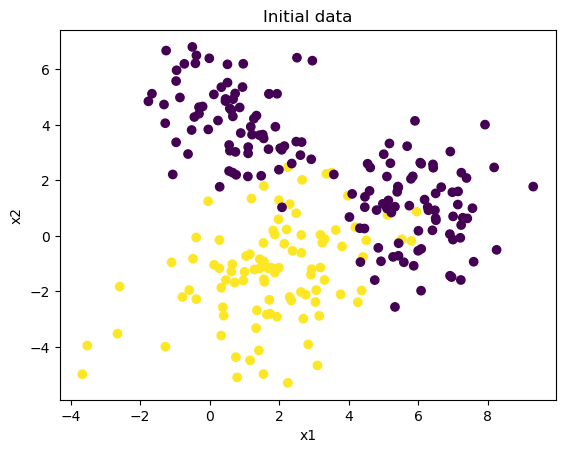

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Initial data')

1. Tune the necessary hyperparameters by for instance grid search. In this exercise we are concerned with
the hyperparameters given in Table 2. Every hyperparameter should be tested for at least 3 values
but you are free to add more testings. There is a desginated validation set that can be used for the
validation of the hyperparameters dist_val.csv

- Initiating kernels (Linear, rbf, poly)

In [8]:
linear_kernel = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge')),
])
rbf_kernel = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=10, C=50))
])
poly_kernel = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

kernels = [linear_kernel, rbf_kernel, poly_kernel]
for kernel in kernels:
    kernel.fit(X,y)
    print(kernel.score(X,y))


0.9036144578313253
0.9799196787148594
0.9437751004016064


1.1 working on grid search for linear kernel


In [9]:
clf = GridSearchCV(SVC(), {
    'kernel': ['linear'],
    'C': [0.01, 0.1, 1, 2, 3, 4, 5, 10, 20]
}, cv=5, return_train_score=False)
clf.fit(X, y)
df = pd.DataFrame(clf.cv_results_)
best_hyperparameters_linear = df[df['rank_test_score'].isin([1, 2, 3, 4, 5])].sort_values('rank_test_score')['params']
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000968,0.000063,0.001010,0.000024,0.01,linear,"{'C': 0.01, 'kernel': 'linear'}",0.90,0.92,0.86,0.92,0.836735,0.887347,0.033472,9
1,0.001615,0.000503,0.000000,0.000000,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.90,0.92,0.86,0.92,0.877551,0.895510,0.023678,1
2,0.004227,0.004429,0.000601,0.000491,1,linear,"{'C': 1, 'kernel': 'linear'}",0.88,0.92,0.86,0.92,0.857143,0.887429,0.027736,2
3,0.002018,0.000659,0.000809,0.000405,2,linear,"{'C': 2, 'kernel': 'linear'}",0.88,0.92,0.86,0.92,0.857143,0.887429,0.027736,2
4,0.001828,0.000370,0.000622,0.000509,3,linear,"{'C': 3, 'kernel': 'linear'}",0.88,0.92,0.86,0.92,0.857143,0.887429,0.027736,2
5,0.002643,0.001082,0.000800,0.000400,4,linear,"{'C': 4, 'kernel': 'linear'}",0.88,0.92,0.86,0.92,0.857143,0.887429,0.027736,2
6,0.002923,0.000442,0.001000,0.000006,5,linear,"{'C': 5, 'kernel': 'linear'}",0.88,0.92,0.86,0.92,0.857143,0.887429,0.027736,2
7,0.002628,0.000502,0.000200,0.000400,10,linear,"{'C': 10, 'kernel': 'linear'}",0.88,0.92,0.86,0.92,0.857143,0.887429,0.027736,2
8,0.003936,0.000904,0.000607,0.000495,20,linear,"{'C': 20, 'kernel': 'linear'}",0.88,0.92,0.86,0.92,0.857143,0.887429,0.027736,2


1.2 working on grid search for rbf kernel

In [10]:
clf = GridSearchCV(SVC(), {
    'kernel': ['rbf'],
    'C': [0.01, 0.1, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50],
    'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]
}, cv=5, return_train_score=False)
clf.fit(X, y)
df = pd.DataFrame(clf.cv_results_)
best_hyperparameters_rbf = df[df['rank_test_score'].isin([1, 2, 3, 4, 5])].sort_values('rank_test_score')['params']
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001837,4.211771e-04,0.001410,0.000794,0.01,1,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",0.60,0.60,0.60,0.60,0.612245,0.602449,0.004898,53
1,0.003424,5.171160e-04,0.001702,0.000601,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.60,0.60,0.60,0.60,0.612245,0.602449,0.004898,53
2,0.003196,4.032195e-04,0.001853,0.000391,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.60,0.60,0.60,0.60,0.612245,0.602449,0.004898,53
3,0.002644,7.876140e-04,0.001622,0.000478,0.01,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.60,0.60,0.60,0.60,0.612245,0.602449,0.004898,53
4,0.003841,3.110545e-03,0.001988,0.001046,0.01,0.0001,rbf,"{'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}",0.60,0.60,0.60,0.60,0.612245,0.602449,0.004898,53
5,0.003933,7.752458e-04,0.002198,0.000401,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.80,0.78,0.78,0.76,0.795918,0.783184,0.014161,49
6,0.002421,4.846489e-04,0.002441,0.002841,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.90,1.00,0.88,0.92,0.938776,0.927755,0.041114,1
7,0.002246,4.565230e-04,0.001210,0.000395,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.88,0.96,0.82,0.94,0.857143,0.891429,0.051903,41
8,0.002448,4.935434e-04,0.001600,0.000490,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.60,0.60,0.60,0.60,0.612245,0.602449,0.004898,53
9,0.003011,6.332913e-04,0.001639,0.000472,0.1,0.0001,rbf,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.60,0.60,0.60,0.60,0.612245,0.602449,0.004898,53


1.3 working on grid search for poly kernel

In [11]:
clf = GridSearchCV(SVC(), {
    'kernel': ['poly'],
    'C': [0.01, 0.1, 1, 2, 3, 4, 5, 10, 20, 30],
    'degree' : [1, 2, 3, 4, 5, 6, 7, 8],
}, cv=5, return_train_score=False)
clf.fit(X, y)
df = pd.DataFrame(clf.cv_results_)
best_hyperparameters_poly = df[df['rank_test_score'].isin([1, 2, 3, 4, 5])].sort_values('rank_test_score')['params']
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002232,0.000698,0.001015,0.000029,0.01,1,poly,"{'C': 0.01, 'degree': 1, 'kernel': 'poly'}",0.64,0.70,0.68,0.72,0.734694,0.694939,0.033093,78
1,0.002620,0.000466,0.000926,0.000496,0.01,2,poly,"{'C': 0.01, 'degree': 2, 'kernel': 'poly'}",0.60,0.60,0.60,0.60,0.612245,0.602449,0.004898,80
2,0.003002,0.000647,0.001005,0.000009,0.01,3,poly,"{'C': 0.01, 'degree': 3, 'kernel': 'poly'}",0.72,0.80,0.86,0.94,0.959184,0.855837,0.088714,31
3,0.002432,0.000769,0.001207,0.000398,0.01,4,poly,"{'C': 0.01, 'degree': 4, 'kernel': 'poly'}",0.48,0.58,0.72,0.84,0.816327,0.687265,0.138218,79
4,0.001625,0.000509,0.000599,0.000489,0.01,5,poly,"{'C': 0.01, 'degree': 5, 'kernel': 'poly'}",0.56,0.62,0.74,0.92,0.877551,0.743510,0.140042,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.004242,0.000383,0.000400,0.000490,30,4,poly,"{'C': 30, 'degree': 4, 'kernel': 'poly'}",0.64,0.82,0.80,0.82,0.857143,0.787429,0.075994,53
76,0.004474,0.000994,0.000622,0.000509,30,5,poly,"{'C': 30, 'degree': 5, 'kernel': 'poly'}",0.88,0.92,0.90,0.90,0.795918,0.879184,0.043512,19
77,0.010470,0.003529,0.000611,0.000499,30,6,poly,"{'C': 30, 'degree': 6, 'kernel': 'poly'}",0.60,0.80,0.80,0.80,0.775510,0.755102,0.078129,66
78,0.006878,0.003025,0.000205,0.000410,30,7,poly,"{'C': 30, 'degree': 7, 'kernel': 'poly'}",0.84,0.92,0.90,0.86,0.795918,0.863184,0.043945,27


In [12]:
print(f"Best hyperparameters for linear kernel\n{best_hyperparameters_linear[:5]} \n"
      "Note: Linear kernel produces the same results for all C values\n")
print(f"Best hyperparameters for rbf kernel\n{best_hyperparameters_rbf[:5]}\n")
print(f"Best hyperparameters for poly kernel\n{best_hyperparameters_poly[:5]}\n")

Best hyperparameters for linear kernel
1    {'C': 0.1, 'kernel': 'linear'}
2      {'C': 1, 'kernel': 'linear'}
3      {'C': 2, 'kernel': 'linear'}
4      {'C': 3, 'kernel': 'linear'}
5      {'C': 4, 'kernel': 'linear'}
Name: params, dtype: object 
Note: Linear kernel produces the same results for all C values

Best hyperparameters for rbf kernel
6     {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
52    {'C': 40, 'gamma': 0.01, 'kernel': 'rbf'}
21      {'C': 3, 'gamma': 0.1, 'kernel': 'rbf'}
42    {'C': 20, 'gamma': 0.01, 'kernel': 'rbf'}
47    {'C': 30, 'gamma': 0.01, 'kernel': 'rbf'}
Name: params, dtype: object

Best hyperparameters for poly kernel
18    {'C': 1, 'degree': 3, 'kernel': 'poly'}
26    {'C': 2, 'degree': 3, 'kernel': 'poly'}
34    {'C': 3, 'degree': 3, 'kernel': 'poly'}
42    {'C': 4, 'degree': 3, 'kernel': 'poly'}
16    {'C': 1, 'degree': 1, 'kernel': 'poly'}
Name: params, dtype: object



The results above represents the 5 best hyperparameters for each kernel. The results are sorted by the rank of the test score. Since it is possible that these results are not the best hyperparameters for the kernel, I will test them on the validation set to see which one performs the best.

Initiating kernels (Linear, rbf, poly) with the hyperparameters found in the grid search, and testing the results on the validation set.

In [13]:
kernel_dict = {
    'linear_kernel': Pipeline([
        ('scaler', StandardScaler()),
        ('linear_svc', LinearSVC(C=2, loss='hinge')),
    ]),
    'rbf_kernel': Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=3))
    ]),
    'poly_kernel': Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=2))
    ])
}

val_data = pd.read_csv('data/dist_val.csv', delimiter=';').to_numpy()
X_val = val_data[:, :2]
y_val = val_data[:,2]

for kernel_name, kernel in kernel_dict.items():
    kernel.fit(X, y)
    score = kernel.score(X_val, y_val)
    print(f"{kernel_name}: {score}")

linear_kernel: 0.8829441472073604
rbf_kernel: 0.9092954647732386
poly_kernel: 0.9139456972848642


2. For each kernel, produce a plot of the decision boundary for the best models together with the data.
If you want you can also include the true decision boundary as a compariso. For

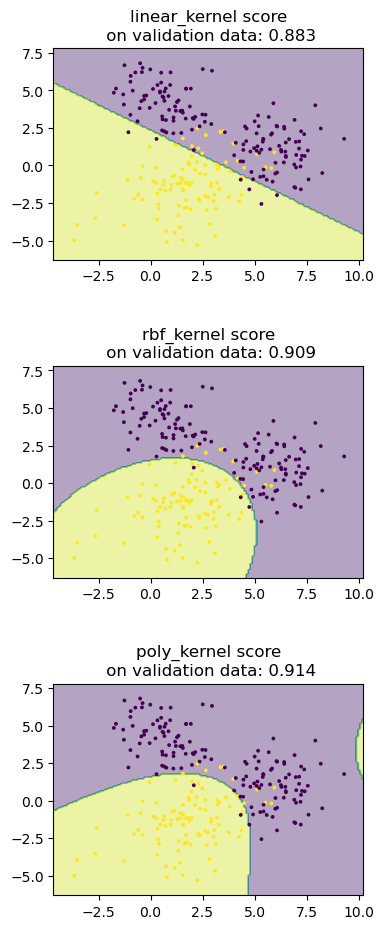

In [33]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

fig, axes = plt.subplots(3, 1, figsize=(4, 11))
fig.subplots_adjust(hspace=0.5)
ax = [axes[0], axes[1], axes[2]]
kernel_list = list(kernel_dict.values())
for i in range(len(ax)):
    kernel = kernel_list[i]
    kernel.fit(X, y)
    score = kernel.score(X_val, y_val)
    Z = kernel.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    if i == 0:
        svc_estimator = kernel.steps[1][1]
    else:
        svc_estimator = kernel.named_steps['svm_clf']
    #support_indices = svc_estimator.support_
    ax[i].contourf(xx, yy, Z, alpha=0.4)
    ax[i].scatter(X[:, 0], X[:, 1], c=y, s=3)
    ax[i].set_title(f"{list(kernel_dict.keys())[i]} score\n on validation data: {round(score, 3)}")